In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
import pg8000
import sys
import os
import pathlib2

In [34]:
home = pathlib2.Path.home()
full_path = home/"documents"/"github"/"SMART_goals"/"data"/"human_smart_data.csv"
full_path = str(full_path)
full_path
hdata = pd.read_csv(full_path)

In [37]:
#hdata = hdata.set_index(pd.DatetimeIndex(hdata['recording_date']))
#df = df.set_index(pd.DatetimeIndex(df['b']))
hdata['recording_date'] = pd.to_datetime(hdata['recording_date'], format='%Y-%m-%d')
hdata.set_index(['recording_date'], inplace = True)
hdata

,anno.res_index_label,patched_cell_container,name,63x_call
recording_date,,,,
2018-01-10,NaN,P8S4_180109_357_A01,H18.03.002.11.06.01,63x no go
2018-01-10,NaN,P9S4_180109_403_A01,H18.03.002.11.04.01,63x no go
2018-01-10,NaN,P2S4_180109_054_A01,H18.03.002.11.03.01,63x go
2018-01-10,NaN,P8S4_180109_358_A01,H18.03.002.11.06.02,63x go
2018-01-10,NaN,P9S4_180109_404_A01,H18.03.002.11.04.02,63x no go
2018-01-10,NaN,P8S4_180109_359_A01,H18.03.002.11.06.03,63x go
2018-01-10,NaN,P9S4_180109_405_A01,H18.03.002.11.04.03,63x no go
2018-01-10,NaN,P8S4_180109_360_A01,H18.03.002.11.06.04,63x go
2018-01-10,NaN,P9S4_180109_406_A01,H18.03.002.11.04.04,63x no go


In [38]:
hdata.dtypes

anno.res_index_label      float64
patched_cell_container     object
name                       object
63x_call                   object
dtype: object

In [39]:
hdata = hdata.groupby(['recording_date']).count()

hdata

,anno.res_index_label,patched_cell_container,name,63x_call
recording_date,,,,
2018-01-10,0,9,9,9
2018-02-01,0,1,1,1
2018-02-02,0,6,6,4
2018-02-21,0,17,17,7
2018-03-12,0,2,2,1
2018-03-13,0,4,4,3
2018-03-14,0,17,17,15
2018-03-20,0,15,15,10
2018-03-21,0,9,9,8


In [40]:
hdata['total_pcc'] = hdata['patched_cell_container'].cumsum()

In [41]:
hd = hdata.reset_index()

In [42]:
hdata_time = hd[['recording_date', 'total_pcc']]
hdata_time.set_index(['recording_date'], inplace=True)

In [43]:
hdata_time.dtypes

total_pcc    int64
dtype: object

In [44]:
hdata_time

,total_pcc
recording_date,
2018-01-10,9
2018-02-01,10
2018-02-02,16
2018-02-21,33
2018-03-12,35
2018-03-13,39
2018-03-14,56
2018-03-20,71
2018-03-21,80


ValueError: invalid literal for int() with base 10: '2018-01-10'

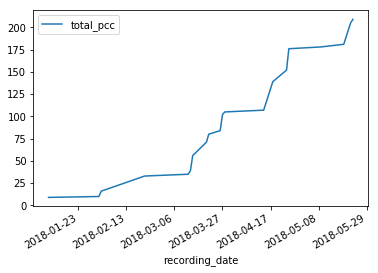

In [47]:
hdata_time.plot()
plt.plot([0,1], [int('2018-01-10'), int('2018-05-23')], color='k')